In [8]:
#Import dependencies 
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

In [9]:
df = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\DSPL\dirty_cafe_sales.csv") 
df1 = df

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


Figure(1000x400)


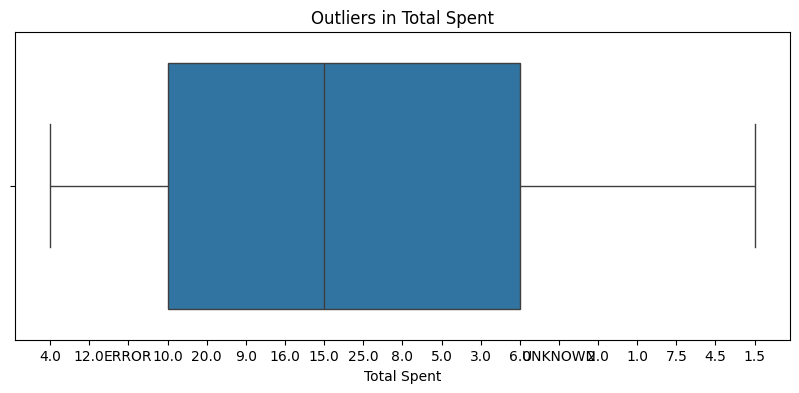

In [11]:
# Checking outliers using boxplot

print(plt.figure(figsize = (10, 4), dpi = 100))
sns.boxplot(x = "Total Spent", data = df)
plt.title("Outliers in Total Spent")
plt.show()


Figure(1000x400)


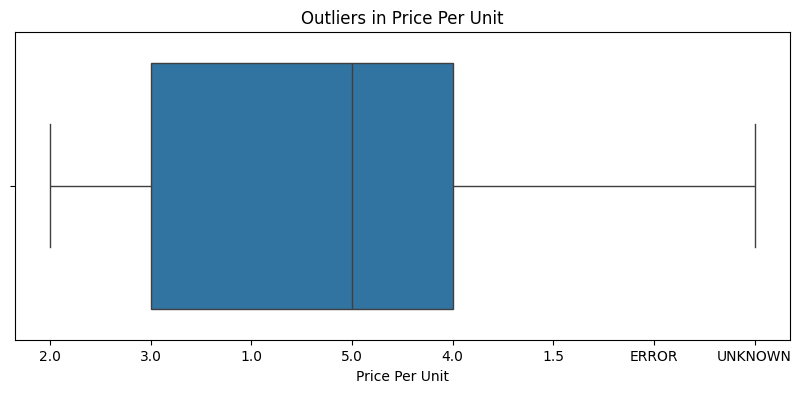

In [12]:
print(plt.figure(figsize = (10, 4), dpi = 100))
sns.boxplot(x = "Price Per Unit", data = df)
plt.title("Outliers in Price Per Unit")
plt.show()


Figure(1000x400)


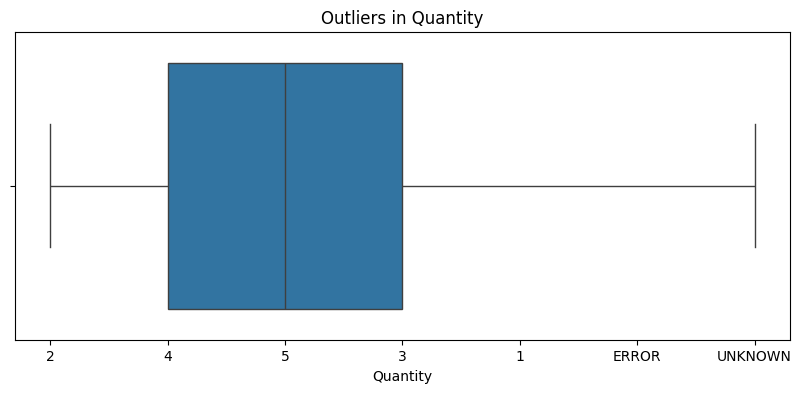

In [13]:
print(plt.figure(figsize = (10, 4), dpi = 100))
sns.boxplot(x = "Quantity", data = df)
plt.title("Outliers in Quantity")
plt.show()


In [14]:
df["Total Spent"] = pd.to_numeric(df["Total Spent"], errors="coerce")
df = df.dropna(subset=["Total Spent"])


In [15]:
# finding IQR
percentile25 = df["Total Spent"].quantile(0.25)
percentile75 = df["Total Spent"].quantile(0.75)

iqr = percentile75 - percentile25

print("Q1:", percentile25)
print("Q3:", percentile75)
print("IQR:", iqr)


Q1: 4.0
Q3: 12.0
IQR: 8.0


In [16]:
# finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper Limit:", upper_limit)
print("Lower Limit:", lower_limit)


Upper Limit: 24.0
Lower Limit: -8.0


In [17]:
# finding outliers using iqr
df[df["Total Spent"] > upper_limit]
df[df["Total Spent"] < lower_limit]


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date


In [18]:
# trimming outliers
new_df = df[(df["Total Spent"] < upper_limit) & 
            (df["Total Spent"] > lower_limit)]

new_df.shape


(9239, 8)

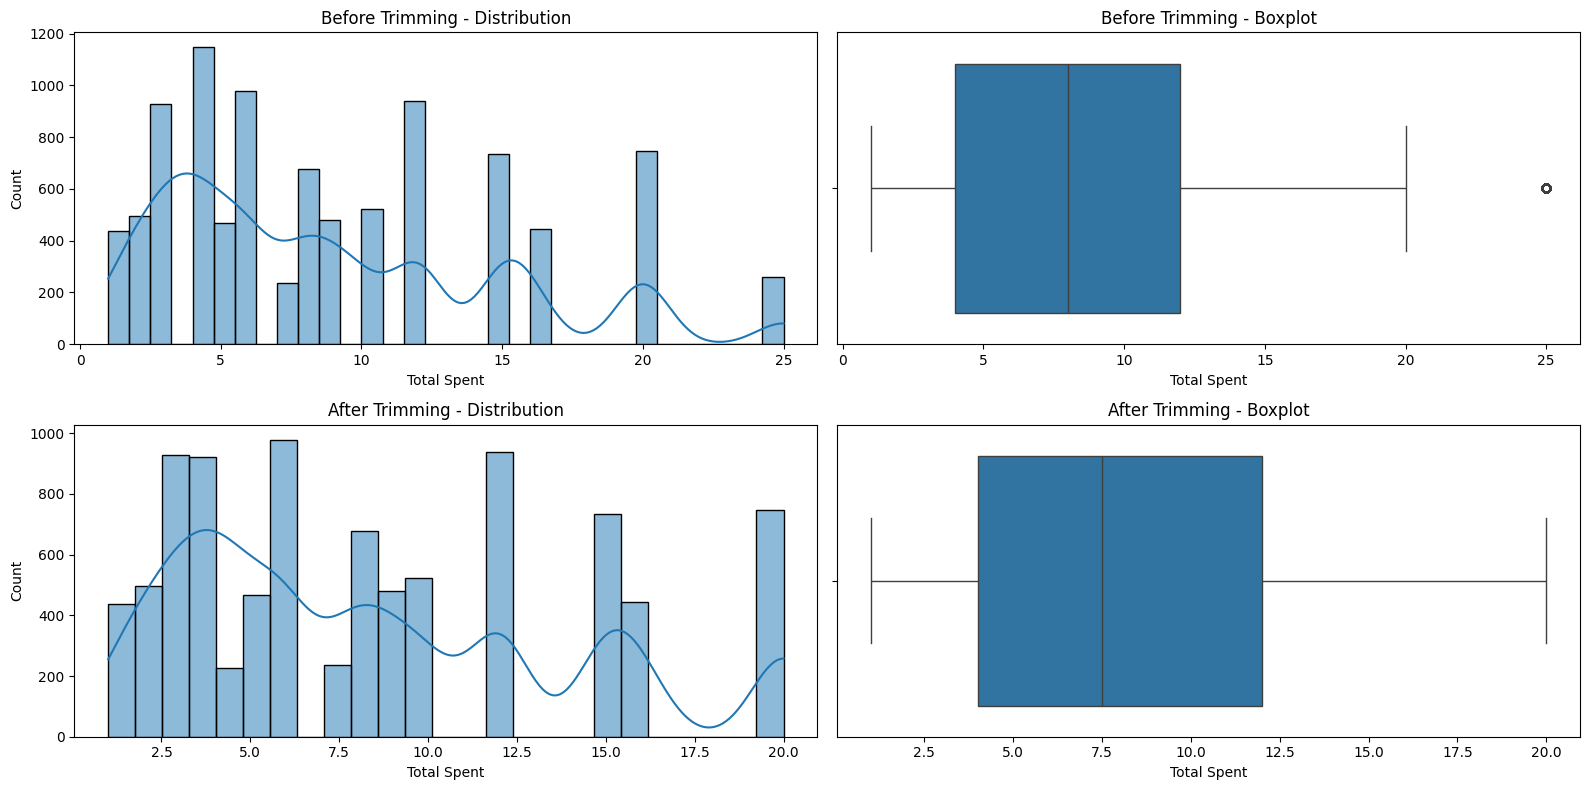

In [19]:
# compare plots after trimming

plt.figure(figsize=(16,8))

# Before trimming - Distribution
plt.subplot(2,2,1)
sns.histplot(df["Total Spent"], kde=True)
plt.title("Before Trimming - Distribution")

# Before trimming - Boxplot
plt.subplot(2,2,2)
sns.boxplot(x=df["Total Spent"])
plt.title("Before Trimming - Boxplot")

# After trimming - Distribution
plt.subplot(2,2,3)
sns.histplot(new_df["Total Spent"], kde=True)
plt.title("After Trimming - Distribution")

# After trimming - Boxplot
plt.subplot(2,2,4)
sns.boxplot(x=new_df["Total Spent"])
plt.title("After Trimming - Boxplot")

plt.tight_layout()
plt.show()


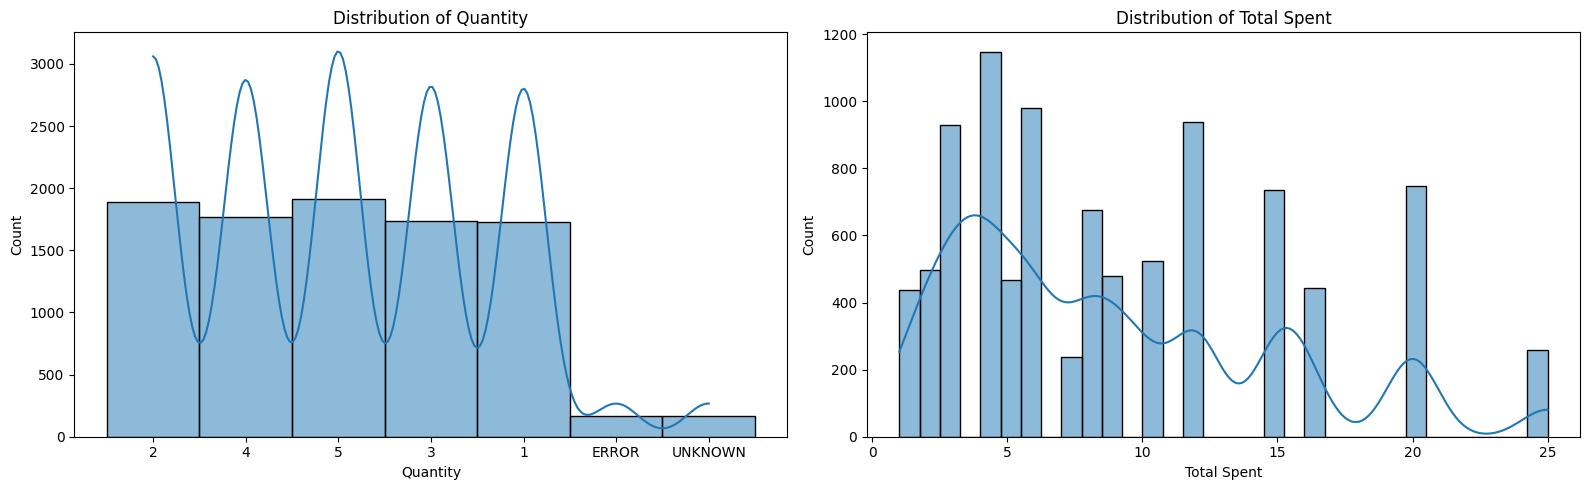

In [20]:
# plot distributions for features

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(16,5))

# Distribution of Quantity
plt.subplot(1,2,1)
sns.histplot(df["Quantity"], kde=True)
plt.title("Distribution of Quantity")

# Distribution of Total Spent
plt.subplot(1,2,2)
sns.histplot(df["Total Spent"], kde=True)
plt.title("Distribution of Total Spent")

plt.tight_layout()
plt.show()


In [21]:
print("Highest allowed:", df["Total Spent"].mean() + 3 * df["Total Spent"].std())
print("Lowest allowed:", df["Total Spent"].mean() - 3 * df["Total Spent"].std())


Highest allowed: 26.954110913752004
Lowest allowed: -9.10540592322768


In [22]:
upper_limit = df["Total Spent"].mean() + 3 * df["Total Spent"].std()
lower_limit = df["Total Spent"].mean() - 3 * df["Total Spent"].std()

print("Upper Limit:", upper_limit)
print("Lower Limit:", lower_limit)


Upper Limit: 26.954110913752004
Lower Limit: -9.10540592322768


In [23]:
df[(df["Total Spent"] > upper_limit) | 
   (df["Total Spent"] < lower_limit)]


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date


In [25]:
print("Original Shape:", df.shape)
print("After Trimming:", new_df.shape)


Original Shape: (9498, 8)
After Trimming: (9239, 8)


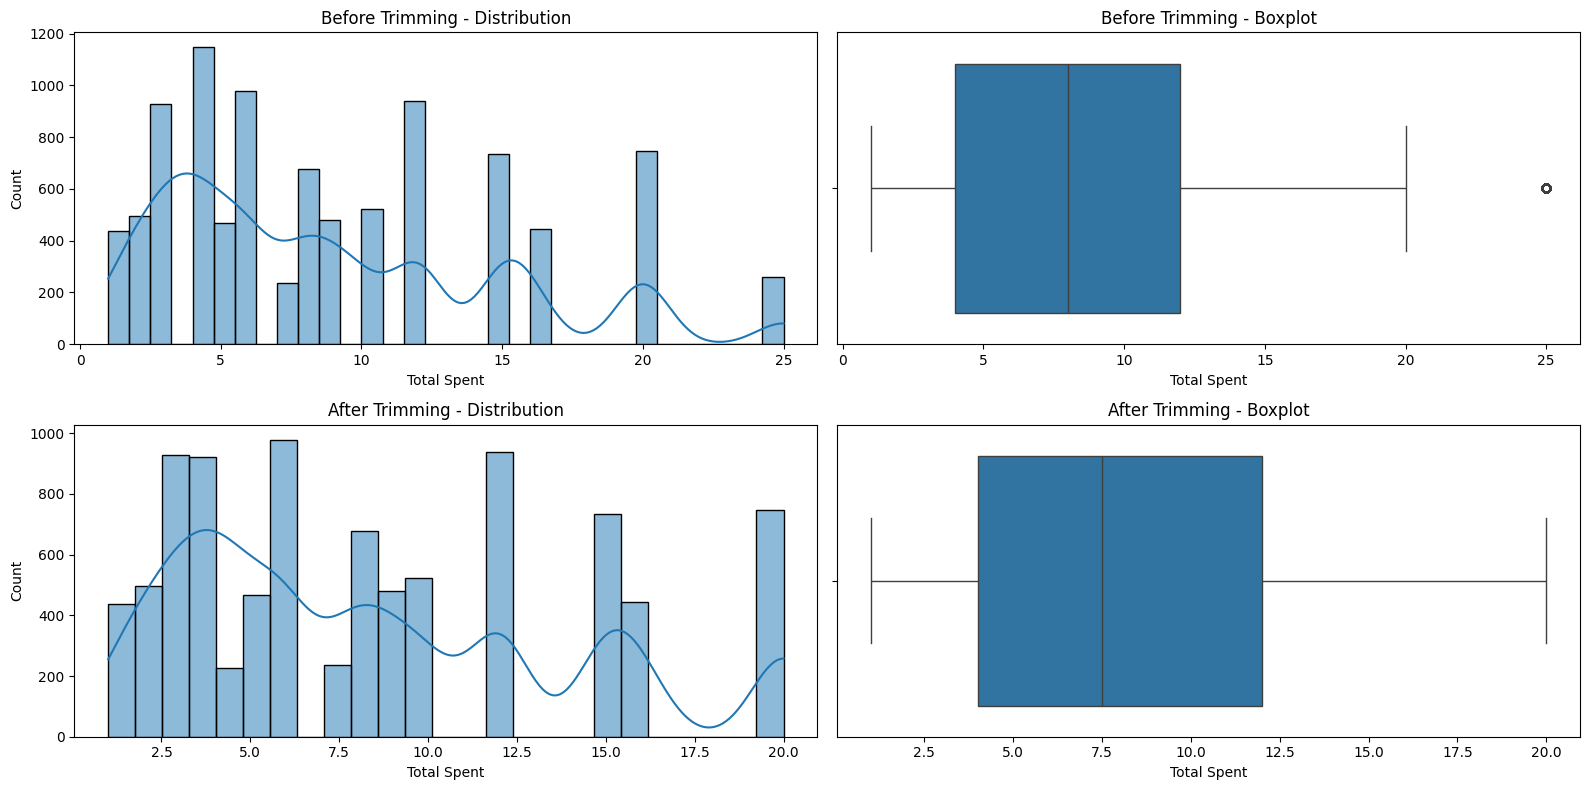

In [26]:
# compare plots after trimming (Z-score method)

plt.figure(figsize=(16,8))

# Before trimming - Distribution
plt.subplot(2,2,1)
sns.histplot(df["Total Spent"], kde=True)
plt.title("Before Trimming - Distribution")

# Before trimming - Boxplot
plt.subplot(2,2,2)
sns.boxplot(x=df["Total Spent"])
plt.title("Before Trimming - Boxplot")

# After trimming - Distribution
plt.subplot(2,2,3)
sns.histplot(new_df["Total Spent"], kde=True)
plt.title("After Trimming - Distribution")

# After trimming - Boxplot
plt.subplot(2,2,4)
sns.boxplot(x=new_df["Total Spent"])
plt.title("After Trimming - Boxplot")

plt.tight_layout()
plt.show()
